IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERATO

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


C:\Users\chiar\AppData\Local\Temp\ipykernel_1744\3033957504.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_1 = df_1.append(df)
C:\Users\chiar\AppData\Local\Temp\ipykernel_1744\3033957504.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_1 = df_1.append(df)
C:\Users\chiar\AppData\Local\Temp\ipykernel_1744\3033957504.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_1 = df_1.append(df)
C:\Users\chiar\AppData\Local\Temp\ipykernel_1744\3033957504.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_1 = df_1.append(df)
C:\Users\chiar\AppData\Local\Temp\ipykernel_1744\3033957504.py:12: FutureWarning: The frame.append m

In [4]:
print(dataframe_collection[17][10])

(1195267, 6416, 5.35, -4.3, -0.69, 5.1, 5.18, 13.57, 28.82, 0.1129947, 0.0576319, -0.2500475, 0.4280109, 0.595269, -10.38203, 0)


In [5]:
print(df_1)

       TimeUS   RPM  Curr  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw  \
0           0  3896  3.19    -0.10 -0.87     -0.66   1.73   19.79  20.02   
1      111984  5342  3.73    -0.70 -0.05     -1.01   1.00   19.80  20.02   
2      228418  5931  3.46    -1.49  0.43     -1.76  -0.76   19.81  20.70   
3      337860  6114  3.42    -2.48  0.28     -1.84  -2.67   19.81  21.96   
4      441908  6122  3.68    -3.54 -0.21     -1.40  -3.43   19.79  23.71   
..        ...   ...   ...      ...   ...       ...    ...     ...    ...   
558  66634408  5535  2.72    -1.63 -1.47     -1.73  -2.92    7.52   4.51   
559  66745164  5467  2.75    -1.93 -1.79     -1.06  -2.71    7.50   4.63   
560  66856077  5424  2.82    -2.20 -1.78     -0.52  -2.60    7.48   4.64   
561  66964131  5381  2.93    -2.22 -2.33     -0.13  -1.62    7.47   4.54   
562  67073735  5353  3.08    -2.28 -2.56      0.15  -0.42    7.45   4.63   

         GyrX      GyrY      GyrZ      AccX      AccY       AccZ  Guasto  
0    0.02622

In [6]:
df_1 = df_1.dropna()

### Matrice di correlazione

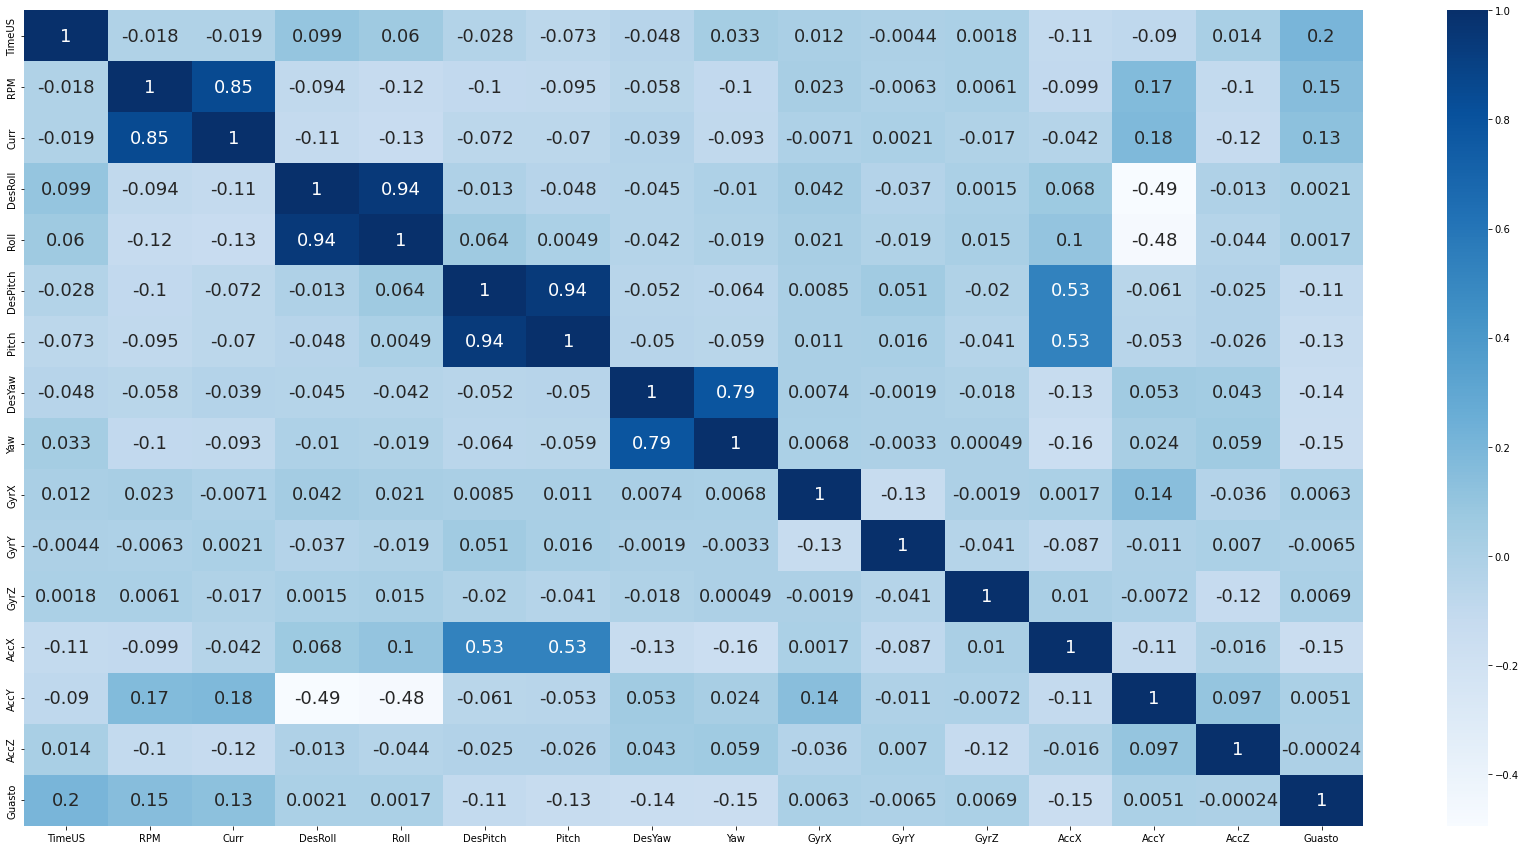

In [7]:
import seaborn as sns

plt.figure(figsize=(30,15))

ax = sns.heatmap(df_1[df_1.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

In [8]:
df_1 = df_1.drop(['TimeUS','DesYaw','DesPitch','DesRoll'], axis=1)

<Figure size 2160x1080 with 0 Axes>

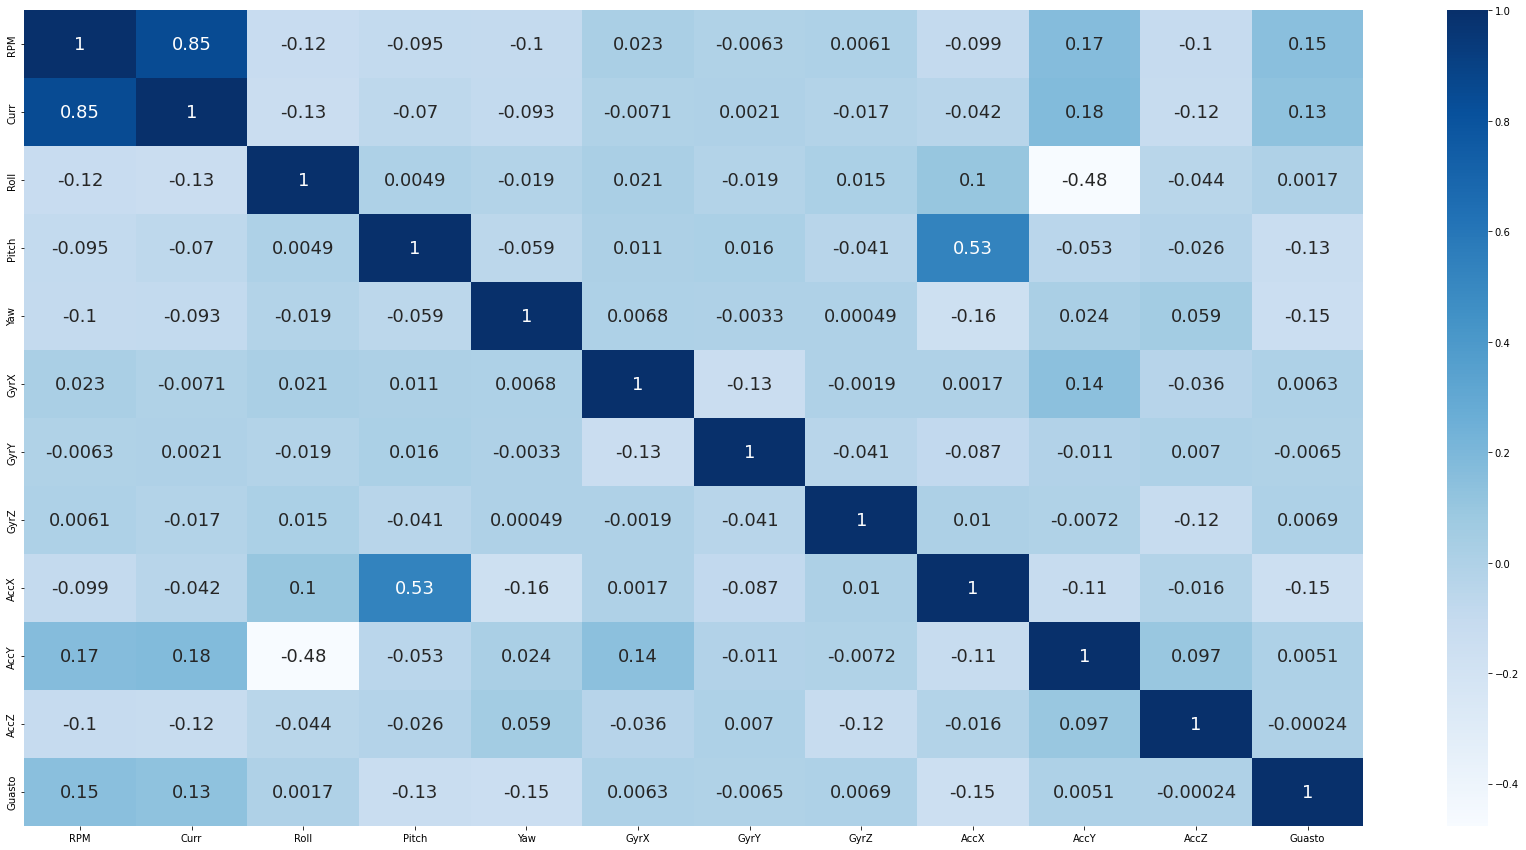

In [9]:
plt.figure(figsize=(30,15))

plt.figure(figsize=(30,15))
ax = sns.heatmap(df_1.corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

### Individuazione feature più importanti

C:\Users\chiar\AppData\Local\Temp\ipykernel_1744\2805028417.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,Y)


[0.11753202 0.11034804 0.0835403  0.09393188 0.19787143 0.05203739
 0.05075814 0.05826959 0.11112347 0.06632148 0.05826628]


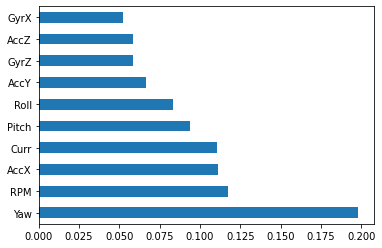

In [10]:
X = df_1.iloc[:,:-1]  #independent columns
Y = df_1.iloc[:,-1:]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [11]:
# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

In [12]:
guasto_10 = df_1[df_1['Guasto'] == 2]
no_guasto = df_1[df_1['Guasto'] == 0]
guasto_5 = df_1[df_1['Guasto'] == 1]

print("No guasto: ", len(no_guasto), "Guasto 5%: ", len(guasto_5), "Guasto 10%: ", len(guasto_10))

No guasto:  3340 Guasto 5%:  3551 Guasto 10%:  4544


### Bilanciamento del dataset

In [13]:
#bilanciamento del dataset con undersampling rispetto al no_guasto
balanced_d = pd.concat([no_guasto, guasto_10.sample(len(no_guasto)), guasto_5.sample(len(no_guasto))])
x = balanced_d.iloc[:,:-1]
y = balanced_d.iloc[:,-1:]
balanced_d.shape

(10020, 12)

### Separazione del dataset in training e test

In [14]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8016, 11)
(2004, 11)
(8016, 1)
(2004, 1)


In [15]:
# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs),
    RandomForestClassifier(n_estimators = 10, random_state=rs),
    GradientBoostingClassifier(random_state= rs),
    AdaBoostClassifier(n_estimators=10, random_state= rs),
    LinearDiscriminantAnalysis(),
    SVC(probability=True)
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

### Classificazione

In [16]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold))
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) #need to maximize
    train_pred = clf.predict_proba(x_test)
    print(f'Accuracy: {acc} \t ---> {name} ')
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)
    

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())

C:\Users\chiar\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\chiar\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Accuracy: 0.5 	 ---> LogisticRegression 
Accuracy: 0.69 	 ---> DecisionTreeClassifier 
Accuracy: 0.76 	 ---> RandomForestClassifier 
Accuracy: 0.72 	 ---> GradientBoostingClassifier 
Accuracy: 0.55 	 ---> AdaBoostClassifier 
Accuracy: 0.52 	 ---> LinearDiscriminantAnalysis 
Accuracy: 0.46 	 ---> SVC 


### Matrici di confusione

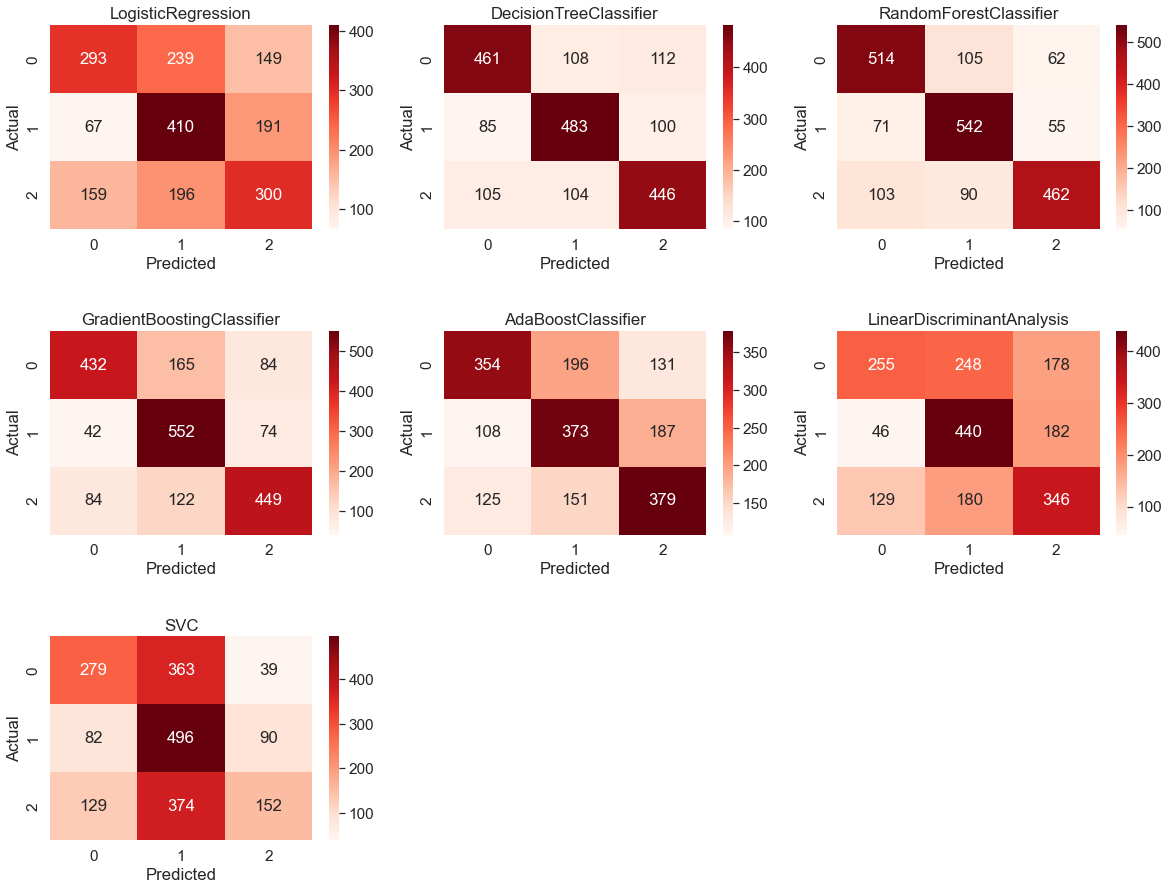

In [17]:
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])